<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/1_getting_started_roadmap/9_custom_network_builder/1)%20Create%20a%20simple%20custom%20network%20while%20debugging%20it.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals


### Learn how to create custom network

# Table of Contents


## [0. Install](#0)


## [1. Load Data](#1)


## [2. Create and debug network](#2)


## [3. Train](#3)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [1]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (219/219), done.
remote: Total 2921 (delta 128), reused 44 (delta 20), pack-reused 2682
Receiving objects: 100% (2921/2921), 81.09 MiB | 4.20 MiB/s, done.
Resolving deltas: 100% (1673/1673), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - Stanford Dogs classification dataset
    - https://www.kaggle.com/jessicali9530/stanford-dogs-dataset

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1b4tC_Pl1O80of7U-PJ7VExmszzSX3ZEM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1b4tC_Pl1O80of7U-PJ7VExmszzSX3ZEM" -O dogs-species-dataset.zip && rm -rf /tmp/cookies.txt

In [3]:
! unzip -qq dogs-species-dataset.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='1'></a>
# Load data

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("project", "basic_custom_model");

Mxnet Version: 1.5.0

Experiment Details
    Project: project
    Experiment: basic_custom_model
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.3_roadmaps/1_getting_started_roadmap/9_custom_network_builder/workspace/project/basic_custom_model/



## Set Data params

In [4]:
gtf.Dataset_Params(dataset_path="dogs-species-dataset/train", 
                   
                   split=0.9,
                    
                   input_size=224, 
                   
                   batch_size=2, 
                   
                   shuffle_data=True, 
                   
                   num_processors=3);

Dataset Details
    Train path:     dogs-species-dataset/train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   2
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.9



## Apply Transforms

In [5]:
gtf.apply_random_horizontal_flip(train=True, val=True);
gtf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True);

## Load Dataset

In [6]:
gtf.Dataset();

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 18522
    Num val images:   2058
    Num classes:      120



Process ForkPoolWorker-2:
Process ForkPoolWorker-5:
Process ForkPoolWorker-6:
Process ForkPoolWorker-1:
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/p

<a id='2'></a>
# Create custom model with simultaneous debugging

In [7]:
network = [];
network.append(gtf.convolution(output_channels=16));
network.append(gtf.batch_normalization());
network.append(gtf.relu());
network.append(gtf.convolution(output_channels=32));
network.append(gtf.batch_normalization());
network.append(gtf.relu());
network.append(gtf.average_pooling(kernel_size=2));

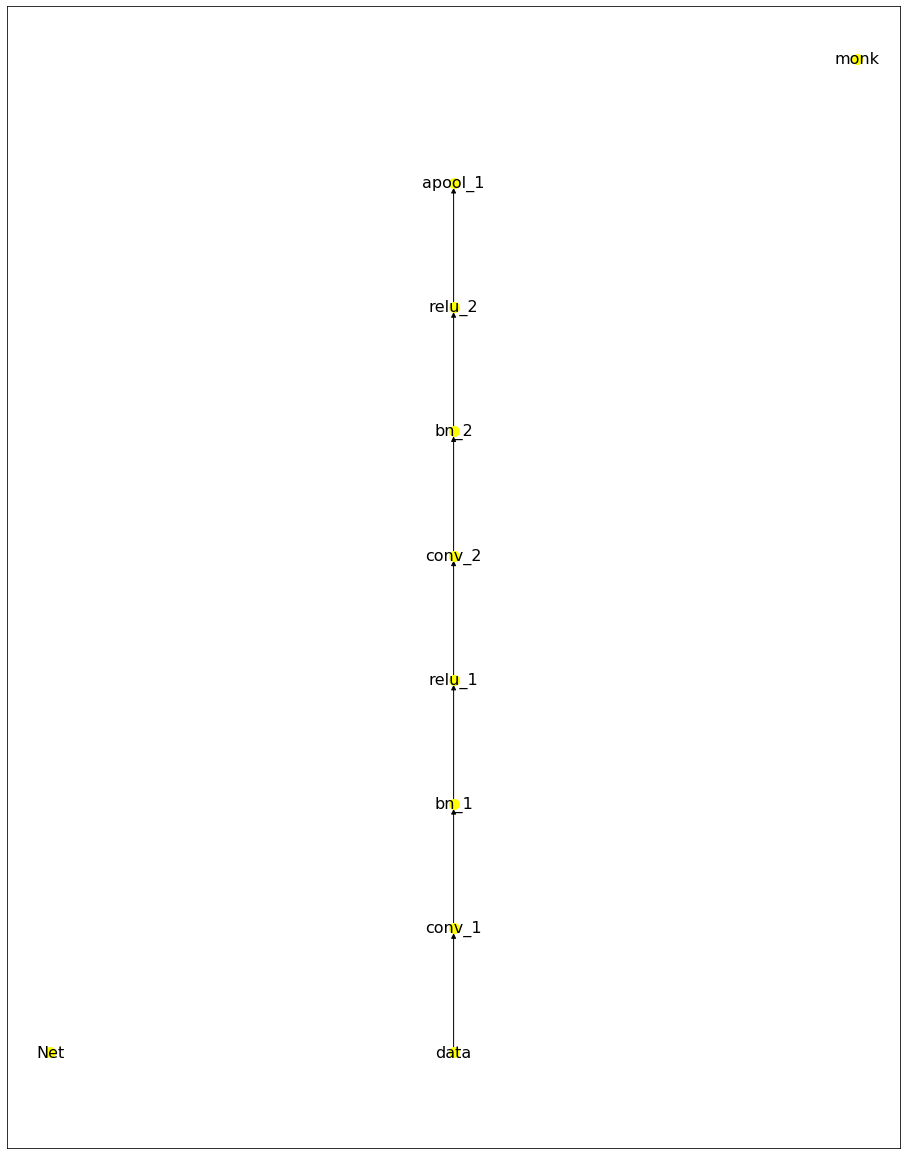

In [9]:
gtf.debug_custom_model_design(network);

In [8]:
network.append(gtf.convolution(output_channels=64));
network.append(gtf.batch_normalization());
network.append(gtf.relu());
network.append(gtf.convolution(output_channels=64));
network.append(gtf.batch_normalization());
network.append(gtf.relu());
network.append(gtf.average_pooling(kernel_size=2));

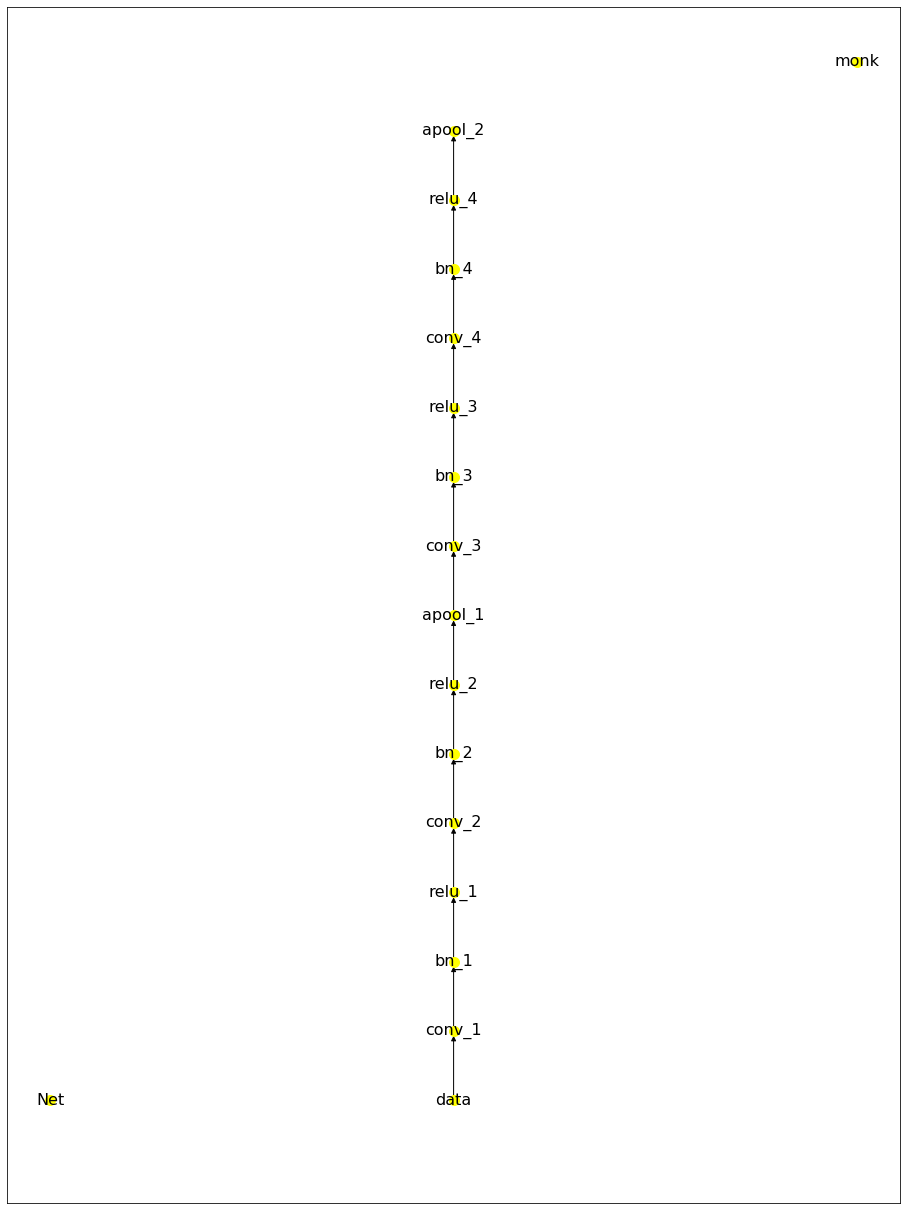

In [11]:
gtf.debug_custom_model_design(network);

In [9]:
network.append(gtf.convolution(output_channels=128));
network.append(gtf.batch_normalization());
network.append(gtf.relu());
network.append(gtf.convolution(output_channels=128));
network.append(gtf.batch_normalization());
network.append(gtf.relu());
network.append(gtf.average_pooling(kernel_size=2));

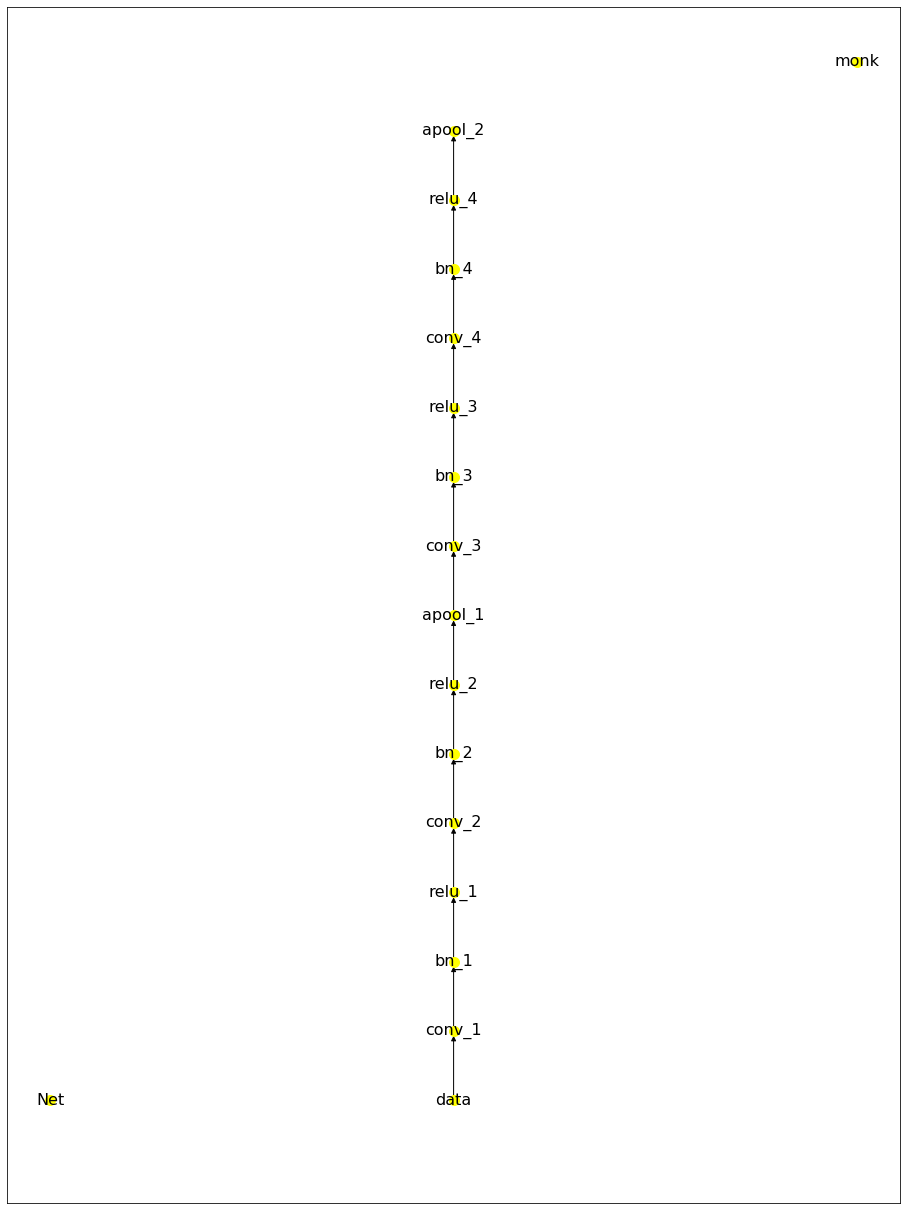

In [12]:
gtf.debug_custom_model_design(network);

In [11]:
network.append(gtf.flatten());
network.append(gtf.dropout(drop_probability=0.2));
network.append(gtf.fully_connected(units=1024));
network.append(gtf.dropout(drop_probability=0.2));
network.append(gtf.fully_connected(units=gtf.system_dict["dataset"]["params"]["num_classes"]));

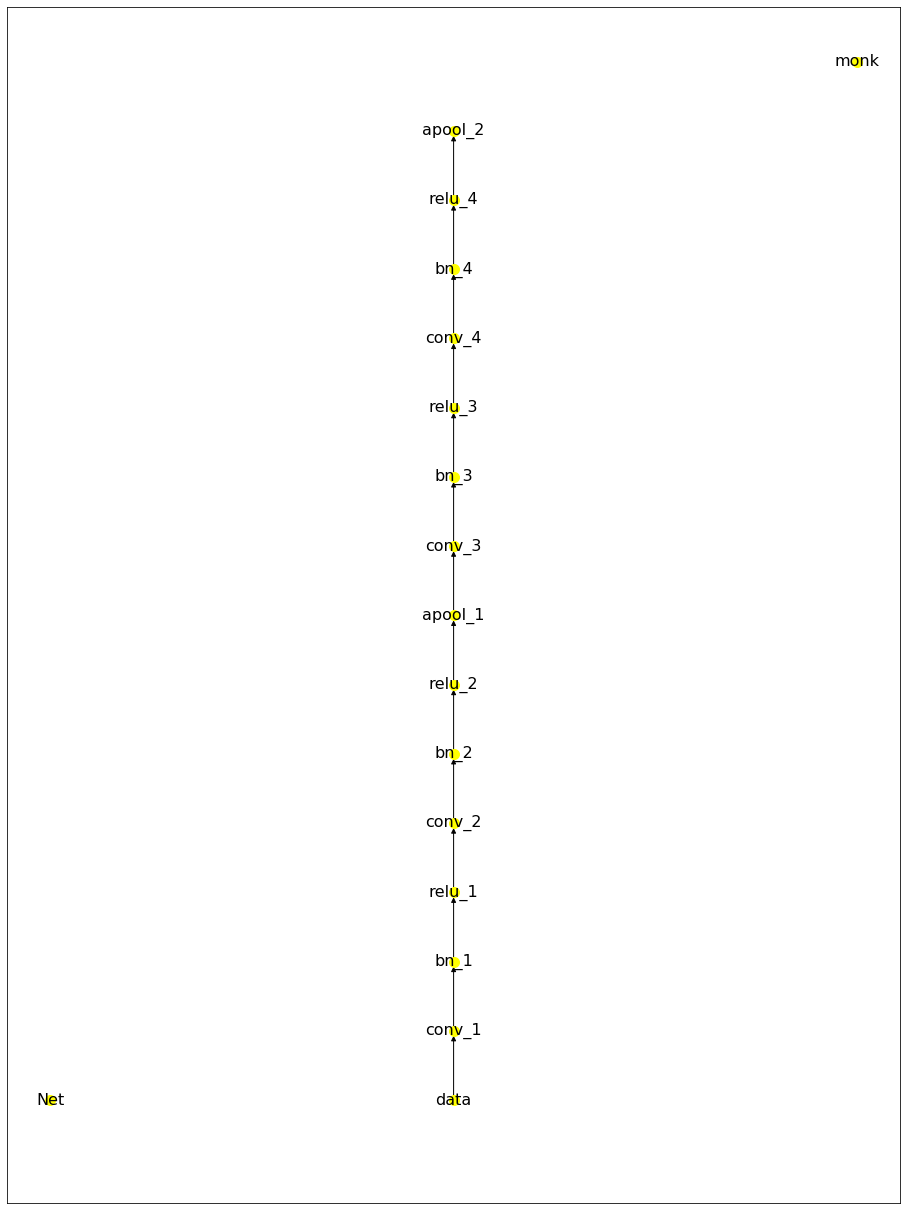

In [13]:
gtf.debug_custom_model_design(network);

## Create and setup model

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           Custom Model
        Num of potentially trainable layers:  16
        Num of actual trainable layers:       16



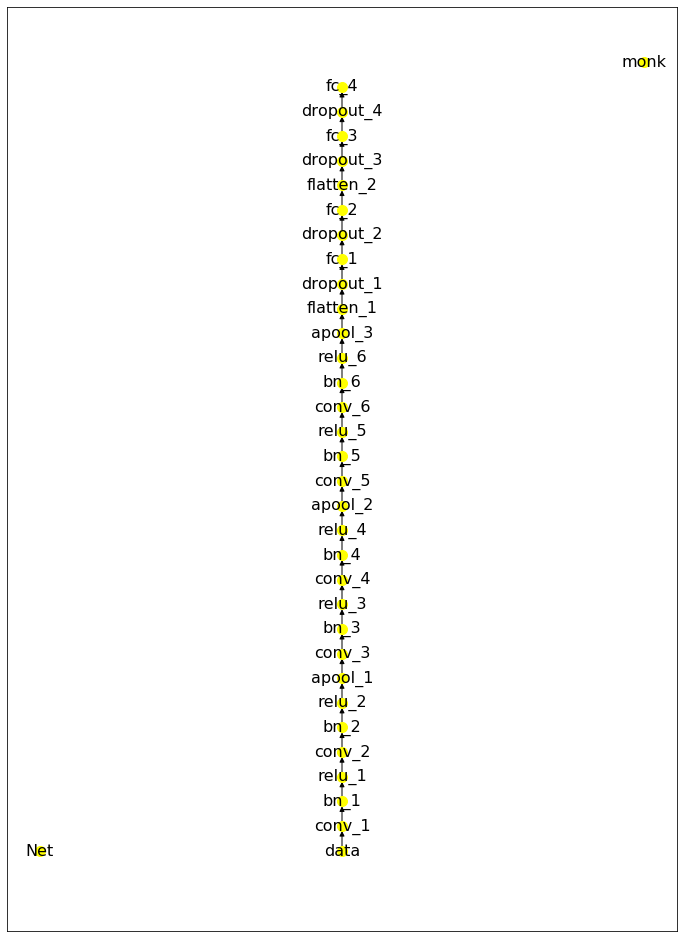

In [12]:
gtf.Compile_Network(network, data_shape=(3, 224, 224));

## Visualize with netron

In [13]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8081);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model-symbol.json' at http://localhost:8081


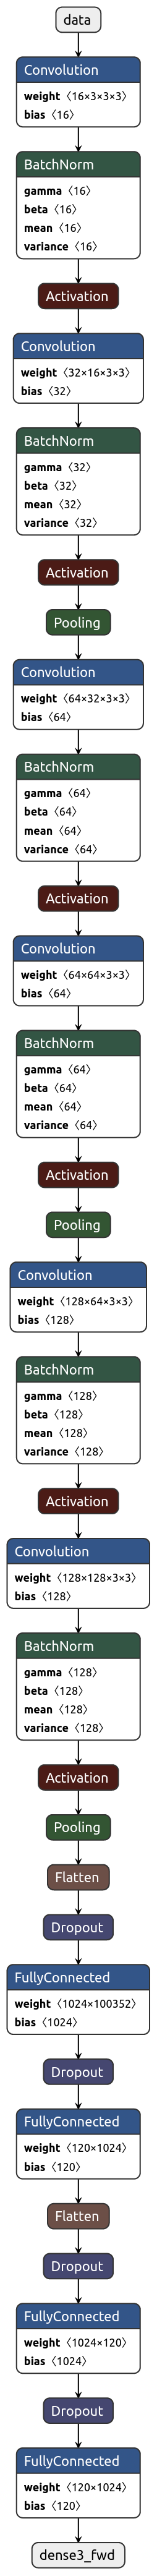

In [14]:
from IPython.display import Image
Image(filename='imgs/basic_custom_network.png') 

## Set Training params

In [16]:
gtf.Training_Params(num_epochs=5, 
                    
                    display_progress=True, 
                    
                    display_progress_realtime=True, 
        
                    save_intermediate_models=False,
                    
                    save_training_logs=True);

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  False



In [16]:
## Set Optimizer, losses and learning rate schedulers

In [17]:
gtf.optimizer_sgd(0.0001);

Optimizer
    Name:          sgd
    Learning rate: 0.0001
    Params:        {'lr': 0.0001, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}





monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [18]:
gtf.lr_fixed();

Learning rate scheduler
    Name:   fixed
    Params: {}



In [19]:
gtf.loss_softmax_crossentropy()

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}



In [ ]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed